Егоров Д. Н. ИВБО-09-19

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.cluster import MeanShift
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/datasets/checkins.dat'
df = pd.read_csv(path,
                 sep="\|\s+",
                 skiprows=2,
                 names=['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at'],
                 engine='python')
np.random.seed = 1000

In [ ]:
df

,id,user_id,venue_id,latitude,longitude,created_at
0,984301,2041916.0,5222.0,NaN,NaN,2012-04-21 17:39:01
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
2,984315,1764391.0,5222.0,NaN,NaN,2012-04-21 17:37:18
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
4,984249,2146840.0,5222.0,NaN,NaN,2012-04-21 17:42:58
...,...,...,...,...,...,...
1021962,956119,1139114.0,29488.0,42.439479,-83.743830,2012-04-13 11:36:44
1021963,956447,2088020.0,4432.0,NaN,NaN,2012-04-13 12:58:05
1021964,956733,960666.0,60.0,42.331427,-83.045754,2012-04-13 21:56:19
1021965,957139,1771518.0,10935.0,NaN,NaN,2012-04-14 02:44:52


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021967 entries, 0 to 1021966
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1021967 non-null  object 
 1   user_id     1021966 non-null  float64
 2   venue_id    1021966 non-null  float64
 3   latitude    396634 non-null   float64
 4   longitude   396634 non-null   float64
 5   created_at  1021966 non-null  object 
dtypes: float64(4), object(2)
memory usage: 46.8+ MB


In [ ]:
df.dropna(inplace=True)
df

,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
7,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
9,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
10,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18
...,...,...,...,...,...,...
1021959,955561,626076.0,20073.0,40.850100,-73.866246,2012-04-13 09:56:48
1021960,955892,674797.0,2297.0,33.748995,-84.387982,2012-04-13 10:56:03
1021961,956377,845102.0,11195.0,42.765366,-71.467566,2012-04-13 12:08:45
1021962,956119,1139114.0,29488.0,42.439479,-83.743830,2012-04-13 11:36:44


In [ ]:
df.drop(columns=['id', 'user_id', 'venue_id', 'created_at'], inplace=True)
df

,latitude,longitude
1,38.895112,-77.036366
3,33.800745,-84.410520
7,45.523452,-122.676207
9,40.764462,-111.904565
10,33.448377,-112.074037
...,...,...
1021959,40.850100,-73.866246
1021960,33.748995,-84.387982
1021961,42.765366,-71.467566
1021962,42.439479,-83.743830


In [ ]:
df.describe()

,latitude,longitude
count,396634.000000,396634.000000
mean,37.097070,-86.354065
std,8.778760,37.983677
min,-75.250973,-159.670833
25%,33.800745,-111.926052
50%,39.099275,-85.758456
75%,40.802071,-74.056530
max,78.218590,178.424240


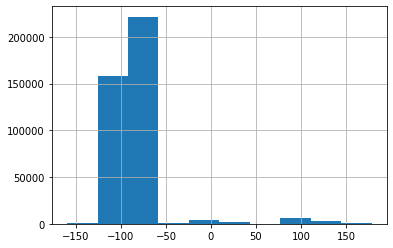

In [ ]:
df[['longitude'].hist()

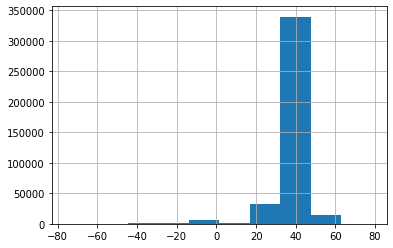

In [ ]:
df['latitude'].hist()

In [ ]:
df = df.loc[:100000, :]
df

,latitude,longitude
1,38.895112,-77.036366
3,33.800745,-84.410520
7,45.523452,-122.676207
9,40.764462,-111.904565
10,33.448377,-112.074037
...,...,...
99986,34.052234,-118.243685
99988,35.149534,-90.048980
99990,51.759248,19.455983
99991,36.114646,-115.172816


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd95f2cedd0>,
      dtype=object)

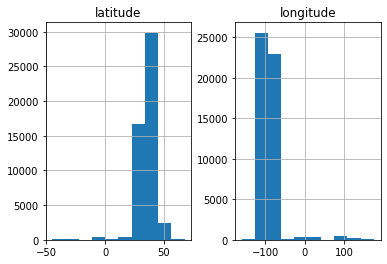

In [ ]:
# для интереса (распределения изменились не сильно так что все хорошо)
df.hist()

In [ ]:
df.describe()

,latitude,longitude
count,50159.000000,50159.000000
mean,36.575870,-92.087732
std,7.946036,33.124663
min,-45.031162,-159.670833
25%,33.448377,-112.074037
50%,37.629349,-93.263836
75%,40.732312,-77.036366
max,67.631479,174.908056


# Выполним кластеризацию методом MeanShift

In [ ]:
x_train = df.to_numpy()
x_train

array([[  38.8951118,  -77.0363658],
       [  33.800745 ,  -84.41052  ],
       [  45.5234515, -122.6762071],
       ...,
       [  51.7592485,   19.4559833],
       [  36.114646 , -115.172816 ],
       [  39.952335 ,  -75.163789 ]])

In [ ]:
# bandwidth - размер области на которой рассматриваются объекты для смщещения
targets = MeanShift(bandwidth=10).fit(x_train)

In [ ]:
targets = targets.labels_

In [ ]:
df['targets'] = targets
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,latitude,longitude,targets
1,38.895112,-77.036366,1
3,33.800745,-84.410520,1
7,45.523452,-122.676207,0
9,40.764462,-111.904565,0
10,33.448377,-112.074037,0
...,...,...,...
99986,34.052234,-118.243685,0
99988,35.149534,-90.048980,2
99990,51.759248,19.455983,10
99991,36.114646,-115.172816,0


In [ ]:
freq = df.groupby(by='targets').count().iloc[:, 0].sort_values(ascending=False)
freq

targets
1     21504
0     20351
2      6532
4       444
3       359
5       122
6        99
7        94
8        94
9        76
10       71
12       65
11       52
13       50
15       41
14       39
18       27
17       25
19       20
16       20
20       15
21       11
22        8
33        8
28        5
23        5
26        4
25        4
24        4
27        3
35        1
29        1
30        1
31        1
32        1
34        1
36        1
Name: latitude, dtype: int64

**Мы нашли 36 кластеров**

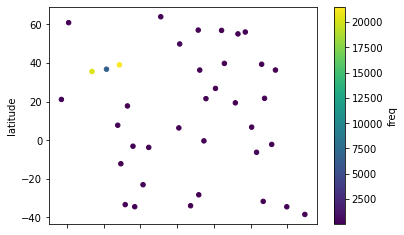

In [ ]:
%matplotlib inline
a = df.groupby(by='targets').mean()
a['freq'] = freq
a.plot.scatter(x='longitude',
               y='latitude',
               c='freq',
               colormap='viridis')


**Как видно, больше всего откликов наблюдается в Северной Америке**

20 самых валидных кластеров

In [ ]:
valid_clusters = freq[:20]
valid_clusters

targets
1     21504
0     20351
2      6532
4       444
3       359
5       122
6        99
7        94
8        94
9        76
10       71
12       65
11       52
13       50
15       41
14       39
18       27
17       25
19       20
16       20
Name: latitude, dtype: int64

# Посчитаем центр каждого из двадцати кластеров

In [ ]:
centroids = df.groupby(by='targets').mean().iloc[valid_clusters.index, :]
centroids

,latitude,longitude
targets,,
1,38.993083,-78.480346
0,35.581232,-115.819977
2,36.765556,-96.085817
4,49.819468,3.584794
3,-6.246184,108.244472
5,-23.035674,-46.313494
6,6.761115,101.565261
7,21.106433,-157.507099
8,-0.343551,36.555642


In [ ]:
for target in centroids.index:
  lt = centroids.loc[target, "latitude"]
  lg = centroids.loc[target, "longitude"]
  print("{:.3f}, {:.3f}".format(lt, lg))
print('\n\n\n')
centroids.index

38.993, -78.480
35.581, -115.820
36.766, -96.086
49.819, 3.585
-6.246, 108.244
-23.036, -46.313
6.761, 101.565
21.106, -157.507
-0.344, 36.556
36.319, 133.962
57.001, 28.848
21.679, 119.124
36.304, 30.903
17.736, -67.553
60.845, -147.637
-34.457, 149.407
7.749, -80.751
26.811, 52.299
19.347, 79.366
-34.435, -57.630






Int64Index([1, 0, 2, 4, 3, 5, 6, 7, 8, 9, 10, 12, 11, 13, 15, 14, 18, 17, 19,
            16],
           dtype='int64', name='targets')

Нанесем центроиды на карту. Каждая точка будет имеет индекс - место в рейтинге, чем оно выше тем точка менее значима для нас

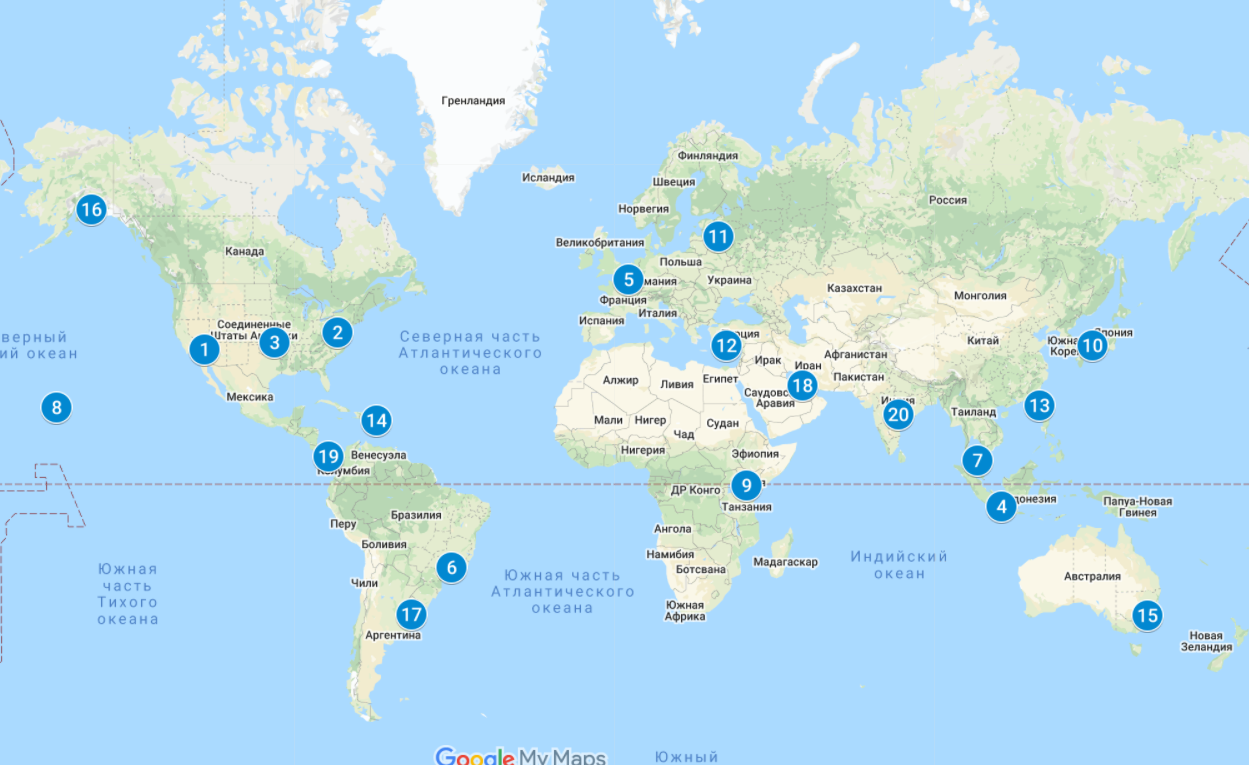

# Рекомендации
способы:
1. Поиграться с bandwidth (посмотреть на зависимость числа кластеров от ее значений, попробовать другие ядра в алгоритме MeanShift или вообще сменить алгоритм)
2. Добавить новые признаки (например климат в данной области, учереждения: близлежащие торговые центры, зоны отыха, рестораны; благосотояние населения в этой области (доходы, политическая обстановка и так далее))
3. Видна корреляция между числом чекинов и близостью к экватору (хоть и слабая). Вполне возможно использовать эту наблюдаемую зависимость в других моделях. Также По полученным данным легко определяется осоновная аудитория приложения (что можно использовать, например для генерации контекстной рекламы в самом приложении).
